# BigMart Sales 

# Problem

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

# Feature 

Item_Identifier : Unique product ID

Item_Weight : Weight of product

Item_Fat_Content : Whether the product is low fat or not

Item_Visibility : The % of total display area of all products in a store allocated to the particular product

Item_Type : The category to which the product belongs

Item_MRP : Maximum Retail Price (list price) of the product

Outlet_Identifier : Unique store ID

Outlet_Establishment_Year : The year in which store was established

Outlet_Size : The size of the store in terms of ground area covered

Outlet_Location_Type : The type of city in which the store is located

Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales : Sales of the product in the particular store.

## Preprocessing and Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set()

In [2]:
train = pd.read_csv('BigMart_Train.csv')
test = pd.read_csv('BigMart_Test.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.dtypes  

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

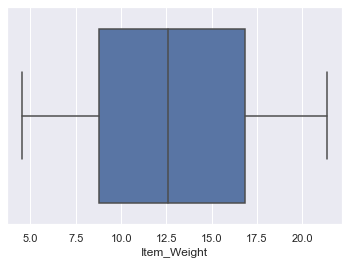

In [5]:
sns.boxplot('Item_Weight',data=train)

In [6]:
train['Item_Weight'].fillna(np.mean(train['Item_Weight']))

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [7]:
train['Item_Weight']= train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [8]:
train.apply(lambda x: x.isnull().sum())

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
train['Outlet_Size']= train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [10]:
train.apply(lambda x: x.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
for i in train:
    print(train[i].value_counts())

FDW13    10
FDG33    10
FDU12     9
FDX20     9
FDP25     9
         ..
FDO33     1
FDY43     1
FDN52     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.560000        2
9.420000        1
5.400000        1
6.520000        1
7.685000        1
Name: Item_Weight, Length: 416, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
0.000000    526
0.076975      3
0.041283      2
0.085622      2
0.187841      2
           ... 
0.092576      1
0.067544      1
0.115168      1
0.146896      1
0.050902      1
Name: Item_Visibility, Length: 7880, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene    

In [12]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(['reg'],'Regular')

In [13]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [14]:
train['Item_Fat_Content'].astype('category')

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: category
Categories (2, object): [Low Fat, Regular]

In [15]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Univariate Analysis

### 1) Item Fat Content

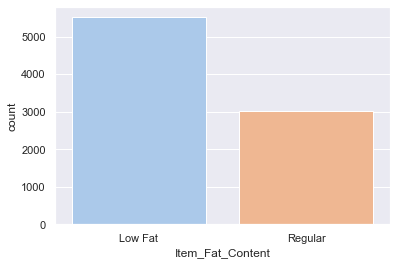

In [16]:
g=sns.countplot(train['Item_Fat_Content'], palette='pastel')

As you can see most of the items have a Low Fat Content

### 2) Item Type

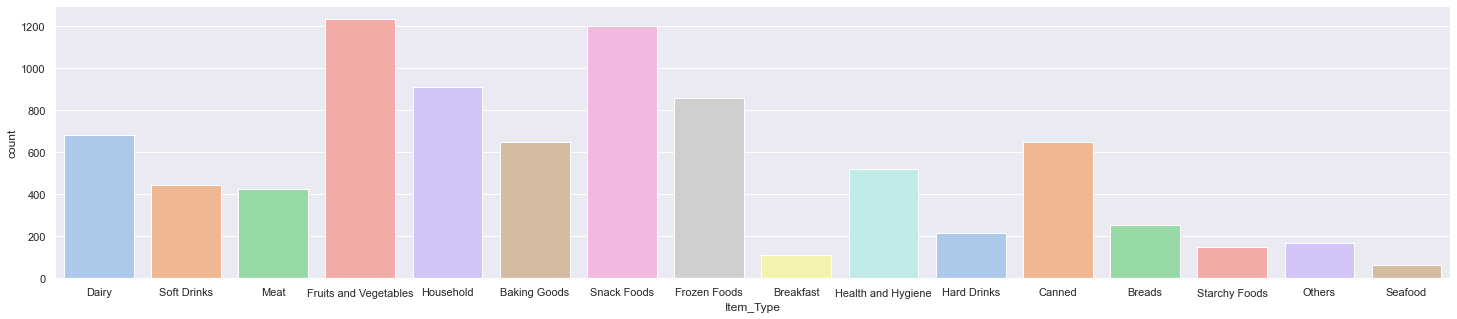

In [17]:
plt.figure(figsize=(25,5))
g=sns.countplot('Item_Type',data=train,palette='pastel')

As you can see most items belong to the Fruit and Vegetable group, followed by Snack Foods.

### 3) Outlet Size

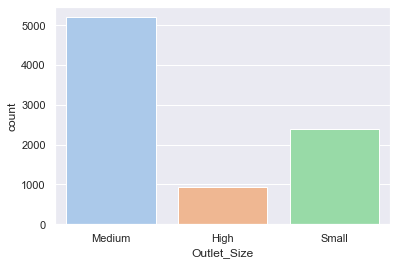

In [18]:
g=sns.countplot('Outlet_Size',data=train,palette='pastel')

As you can see the size of most outlets is Medium, followed by Small and High.

### 4) Outlet Type

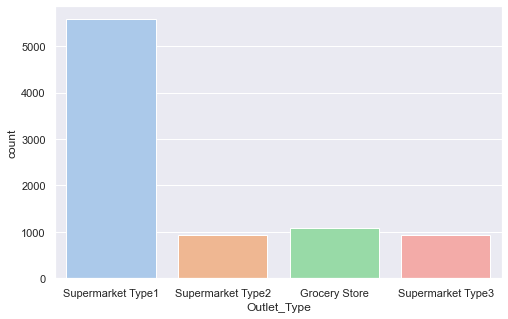

In [19]:
plt.figure(figsize=(8,5))
g=sns.countplot('Outlet_Type',data=train,palette='pastel')

As you can see most of the outlet type is Supermarket Type 1.

## Bivariate Analysis

### 1) Item Fat Content and Item Sales

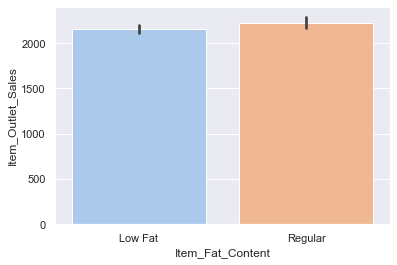

In [20]:
g = sns.barplot(x='Item_Fat_Content',y='Item_Outlet_Sales',palette='pastel', data=train)

As you can see both Low Fat and Regular Fat Content have similar sales, despite the Low Fat items has a higher count than Regular Fat items.

### 2) Item Type and Item Sales

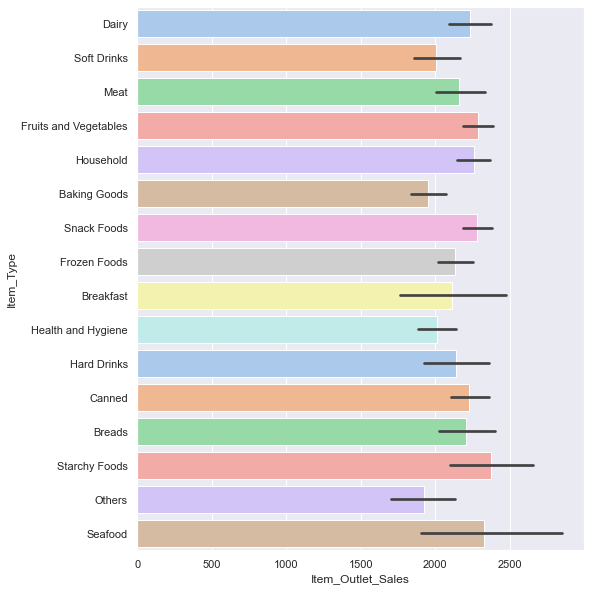

In [21]:
plt.figure(figsize=(8, 10))
g = sns.barplot(x='Item_Outlet_Sales',y='Item_Type',palette='pastel', data=train)

As you can see Seafood and Starchy Foods has higher sales overall but a lot of outliers.

### 3) Outlet Establishment Year and Sales

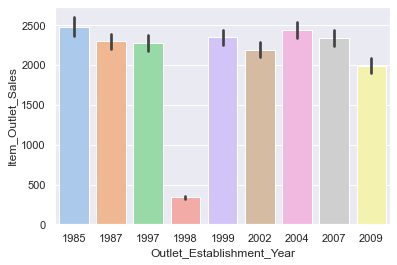

In [22]:
g = sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',palette='pastel', data=train)

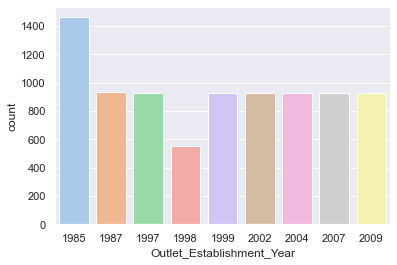

In [23]:
g = sns.countplot('Outlet_Establishment_Year',data=train,palette='pastel')

As you can see the sum of Sales is not really influenced by Outlet Establishment Year but, in 1998 there's an interesting phenomenon that despite the amount of store is only half of the other store but the sales are very low compared to the other store.

## Multivariate Analysis

## 1) Item Type, Item MRP, and Outlet Sales

In [24]:
item_type=np.unique(train['Item_Type'])
highest_MRP_Sales = {}
for types in item_type:
    highest_MRP_Sales[types]=train[train['Item_Type'] == types][['Item_Outlet_Sales','Item_MRP']].max()
        

In [25]:
item_keys=[]
for type in item_type:
    item_keys.append(highest_MRP_Sales[type].Item_MRP)

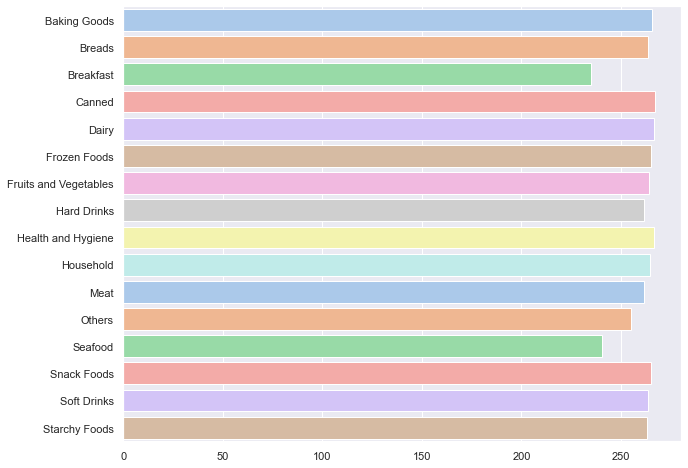

In [26]:
plt.figure(figsize=(10,8))
g=sns.barplot(item_keys,list(highest_MRP_Sales.keys()),palette='pastel')

This graph shows the most ideal maximum retail price for each category.

# Feature Engineering

## Split Target and Feature into Array

In [27]:
X_feature=train[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']]

In [28]:
X_dummy=pd.get_dummies(X_feature,drop_first=True)

In [29]:
X_dummy.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales',
       'Item_Fat_Content_Regular', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [30]:
y = X_dummy['Item_Outlet_Sales'].values
X = X_dummy.drop('Item_Outlet_Sales',axis=1).values

## Scale and Convert Categorical Data 

In [31]:
from sklearn.preprocessing import scale

In [32]:
X_scaled = scale(X)

## Building Model and Predict

In [33]:
# Import the necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42)

In [34]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.5677385392193561
Root Mean Squared Error: 1100.3461063567145


In [35]:
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)

# Fitting the model on our trained dataset.
RF.fit(X_train,y_train)

# Making Predictions
y_pred = RF.predict(X_test)

In [36]:
print("Accuracy Score of Random Forest Classifier on test set: {}".format(RF.score(X_test,y_test)*100))

Accuracy Score of Random Forest Classifier on test set: 60.13220736359759


In [37]:
coef=pd.Series(RF.feature_importances_, X_dummy.drop('Item_Outlet_Sales',axis=1).columns).sort_values(ascending=False)

## The Most Importance Feature

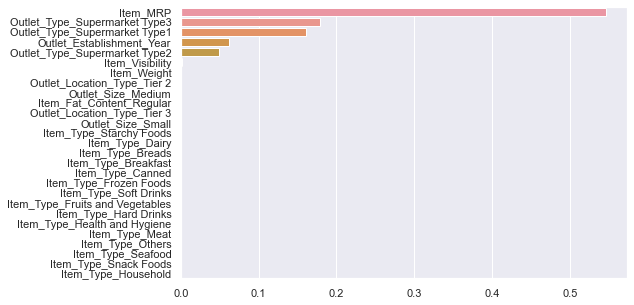

In [40]:
plt.figure(figsize=(8,5))
sns.barplot(coef.values, coef.index)

# Conclusion

As you can see above the most important feature to boost the sales is as following:
1. Item MRP
2. Outlet Type
3. Outlet Establishment Year